In [36]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx
import numpy as np

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions, get_mirna_gene_interactions, gg_interactions, pp_interactions
)
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_risk/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    "mirna": mirna_loader,
    "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [24]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=80,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-11-20 15:04:22,579] A new study created in memory with name: no-name-7fdad892-ed53-4489-979b-03c8d36ff1e6
[I 2024-11-20 15:04:22,731] Trial 0 finished with value: 0.3305099711477334 and parameters: {'lambda': 0.009602548120896363, 'alpha': 1.8190069580360836e-07}. Best is trial 0 with value: 0.3305099711477334.
[I 2024-11-20 15:04:22,850] Trial 1 finished with value: 0.28122031984544377 and parameters: {'lambda': 1.4400799824119096e-07, 'alpha': 0.00028059576109225055}. Best is trial 0 with value: 0.3305099711477334.


New best score: 0.331
Best model performance:
Accuracy: 0.700 ± 0.061
F1 Macro: 0.685 ± 0.051
F1 Weighted: 0.689 ± 0.057
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-11-20 15:04:22,970] Trial 2 finished with value: 0.30318745195663477 and parameters: {'lambda': 3.2345249021562103e-06, 'alpha': 3.2485923177168504e-08}. Best is trial 0 with value: 0.3305099711477334.
[I 2024-11-20 15:04:23,108] Trial 3 finished with value: 0.27302970084860195 and parameters: {'lambda': 0.0002467802247792793, 'alpha': 6.367225813661461e-07}. Best is trial 0 with value: 0.3305099711477334.
[I 2024-11-20 15:04:23,234] Trial 4 finished with value: 0.33742429500569354 and parameters: {'lambda': 1.0188694764929208e-06, 'alpha': 3.583413401993877e-08}. Best is trial 4 with value: 0.33742429500569354.
[I 2024-11-20 15:04:23,374] Trial 5 finished with value: 0.07498688884758245 and parameters: {'lambda': 0.001232877376374037, 'alpha': 0.5427374794474127}. Best is trial 4 with value: 0.33742429500569354.


New best score: 0.337
Best model performance:
Accuracy: 0.700 ± 0.136
F1 Macro: 0.694 ± 0.135
F1 Weighted: 0.695 ± 0.138
[{'acc': 0.5454545454545454, 'f1_macro': np.float64(0.5454545454545454), 'f1_weighted': np.float64(0.5454545454545454)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.9, 'f1_macro': np.float64(0.8901098901098901), 'f1_weighted': np.float64(0.8967032967032967)}, {'acc': 0.6, 'f1_macro': np.float64(0.5833333333333333), 'f1_weighted': np.float64(0.5833333333333333)}]


[I 2024-11-20 15:04:23,494] Trial 6 finished with value: 0.3299285598317766 and parameters: {'lambda': 0.19275661297028557, 'alpha': 0.018426369346596406}. Best is trial 4 with value: 0.33742429500569354.
[I 2024-11-20 15:04:23,639] Trial 7 finished with value: 0.3042458126125179 and parameters: {'lambda': 3.0150096075241798e-05, 'alpha': 0.0038568020472968534}. Best is trial 4 with value: 0.33742429500569354.
[I 2024-11-20 15:04:23,760] Trial 8 finished with value: 0.3125101237877552 and parameters: {'lambda': 1.901908742615969e-07, 'alpha': 6.890724096831799e-08}. Best is trial 4 with value: 0.33742429500569354.
[I 2024-11-20 15:04:23,875] Trial 9 finished with value: 0.3305099711477334 and parameters: {'lambda': 0.3393633280522219, 'alpha': 4.488548033102047e-05}. Best is trial 4 with value: 0.33742429500569354.
[I 2024-11-20 15:04:24,031] Trial 10 finished with value: 0.33742429500569354 and parameters: {'lambda': 2.680951753999874e-08, 'alpha': 5.6867572466268125e-06}. Best is tri

New best score: 0.338
Best model performance:
Accuracy: 0.700 ± 0.136
F1 Macro: 0.694 ± 0.135
F1 Weighted: 0.696 ± 0.137
[{'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6363636363636364)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8181818181818182)}, {'acc': 0.5454545454545454, 'f1_macro': np.float64(0.5454545454545454), 'f1_weighted': np.float64(0.5454545454545454)}, {'acc': 0.9, 'f1_macro': np.float64(0.8901098901098901), 'f1_weighted': np.float64(0.8967032967032967)}, {'acc': 0.6, 'f1_macro': np.float64(0.5833333333333333), 'f1_weighted': np.float64(0.5833333333333333)}]


[I 2024-11-20 15:04:26,498] Trial 29 finished with value: 0.3050129034313449 and parameters: {'lambda': 0.013111166157124324, 'alpha': 1.5678430509178963e-07}. Best is trial 27 with value: 0.3380129564452641.
[I 2024-11-20 15:04:26,622] Trial 30 finished with value: 0.33742429500569354 and parameters: {'lambda': 1.0051307731806935e-08, 'alpha': 2.81178858449893e-08}. Best is trial 27 with value: 0.3380129564452641.
[I 2024-11-20 15:04:26,760] Trial 31 finished with value: 0.30250005079214265 and parameters: {'lambda': 2.0415895596595668e-06, 'alpha': 2.674036367952407e-07}. Best is trial 27 with value: 0.3380129564452641.
[I 2024-11-20 15:04:26,880] Trial 32 finished with value: 0.256445652613726 and parameters: {'lambda': 1.732392060238964e-07, 'alpha': 3.0753784791534495e-06}. Best is trial 27 with value: 0.3380129564452641.
[I 2024-11-20 15:04:27,003] Trial 33 finished with value: 0.3125101237877552 and parameters: {'lambda': 2.4375474507080275e-07, 'alpha': 3.4901564613320723e-07}.

New best score: 0.358
Best model performance:
Accuracy: 0.718 ± 0.053
F1 Macro: 0.704 ± 0.046
F1 Weighted: 0.707 ± 0.052
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.6363636363636364, 'f1_macro': np.float64(0.6333333333333333), 'f1_weighted': np.float64(0.6303030303030303)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-11-20 15:04:27,659] Trial 38 finished with value: 0.41591894372633087 and parameters: {'lambda': 0.01823382628628284, 'alpha': 0.025772534477025374}. Best is trial 38 with value: 0.41591894372633087.
[I 2024-11-20 15:04:27,793] Trial 39 finished with value: 0.3734019041622159 and parameters: {'lambda': 0.022134826513326735, 'alpha': 0.1583552805904082}. Best is trial 38 with value: 0.41591894372633087.


New best score: 0.416
Best model performance:
Accuracy: 0.755 ± 0.046
F1 Macro: 0.741 ± 0.048
F1 Weighted: 0.744 ± 0.050
[{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8181818181818182, 'f1_macro': np.float64(0.8166666666666667), 'f1_weighted': np.float64(0.8151515151515153)}, {'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.7, 'f1_macro': np.float64(0.6703296703296704), 'f1_weighted': np.float64(0.6703296703296703)}]


[I 2024-11-20 15:04:27,912] Trial 40 finished with value: 0.31299413180891705 and parameters: {'lambda': 0.056398281472382725, 'alpha': 0.21458068148903076}. Best is trial 38 with value: 0.41591894372633087.
[I 2024-11-20 15:04:28,046] Trial 41 finished with value: 0.38524225167290765 and parameters: {'lambda': 0.011830984469867587, 'alpha': 0.045778920647100804}. Best is trial 38 with value: 0.41591894372633087.
[I 2024-11-20 15:04:28,165] Trial 42 finished with value: 0.3464285732685259 and parameters: {'lambda': 0.020943164432649958, 'alpha': 0.05840928644207814}. Best is trial 38 with value: 0.41591894372633087.
[I 2024-11-20 15:04:28,281] Trial 43 finished with value: 0.33046566481996803 and parameters: {'lambda': 0.011025665114455886, 'alpha': 0.0542557705764979}. Best is trial 38 with value: 0.41591894372633087.
[I 2024-11-20 15:04:28,420] Trial 44 finished with value: 0.3575850210960192 and parameters: {'lambda': 0.041219932162974336, 'alpha': 0.01491612930127371}. Best is tria

Best model performance:
Accuracy: 0.755 ± 0.046
F1 Macro: 0.741 ± 0.048
F1 Weighted: 0.744 ± 0.050
Best hyperparameters:
{'lambda': 0.01823382628628284, 'alpha': 0.025772534477025374}


In [28]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 0.7272727272727273, 'f1_macro': np.float64(0.7272727272727273), 'f1_weighted': np.float64(0.7272727272727273)}
{'ENSG00000239839': [0.19010156393051147, -0.1827269047498703], 'ENSG00000064687': [0.0002537973632570356, -0.00018471239309292287], 'ENSG00000254995': [-0.0001896519388537854, 0.0002598324208520353], 'ENSG00000240247': [0.14602361619472504, -0.12486929446458817], 'ENSG00000163221': [0.14333613216876984, -0.14063142240047455], 'ENSG00000206047': [0.09613450616598129, -0.08705306053161621], 'ENSG00000122224': [0.1716211587190628, -0.17070314288139343], 'ENSG00000188153': [-0.16164293885231018, 0.15995743870735168], 'ENSG00000233822': [0.22218842804431915, -0.2262953668832779], 'ENSG00000091181': [0.04155983775854111, -0.03935122489929199], 'ENSG00000138131': [2.4355967980227433e-06, 0.0], 'ENSG00000075275': [0.11744114756584167, -0.10638014227151871], 'ENSG00000106976': [-0.07931876927614212, 0.08380475640296936], 'ENSG00000111249': [0.08450515568256378, -0.089982919394

In [29]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/)
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)

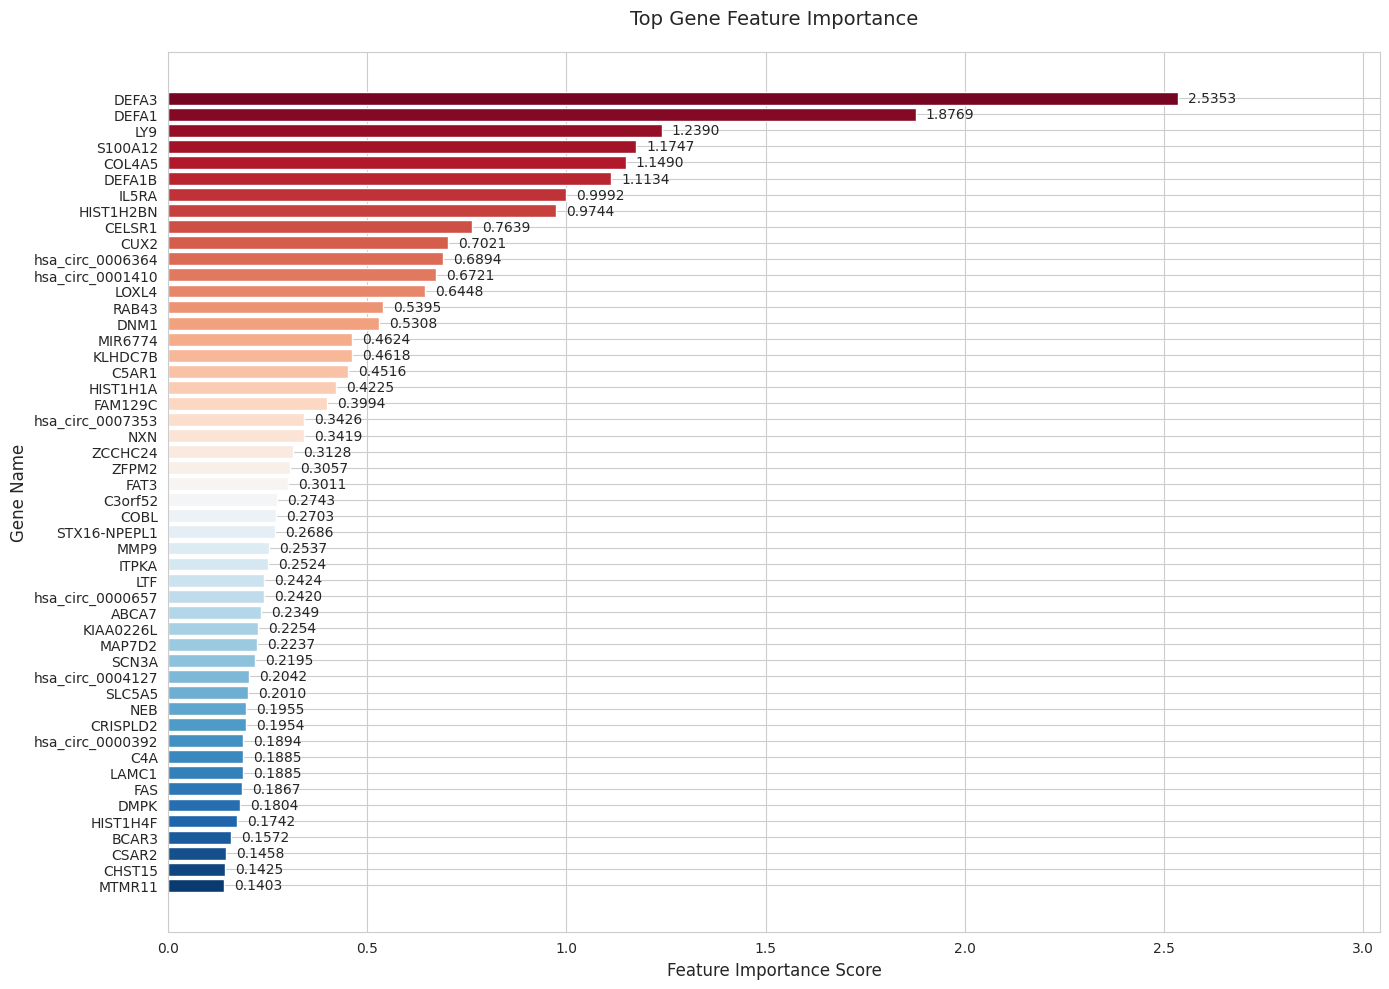

In [30]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top Genes")

In [31]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 40
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [32]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
mrna_A = torch.logical_or(gg_A, pp_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(20), tensor(19.), tensor(18.))

4580


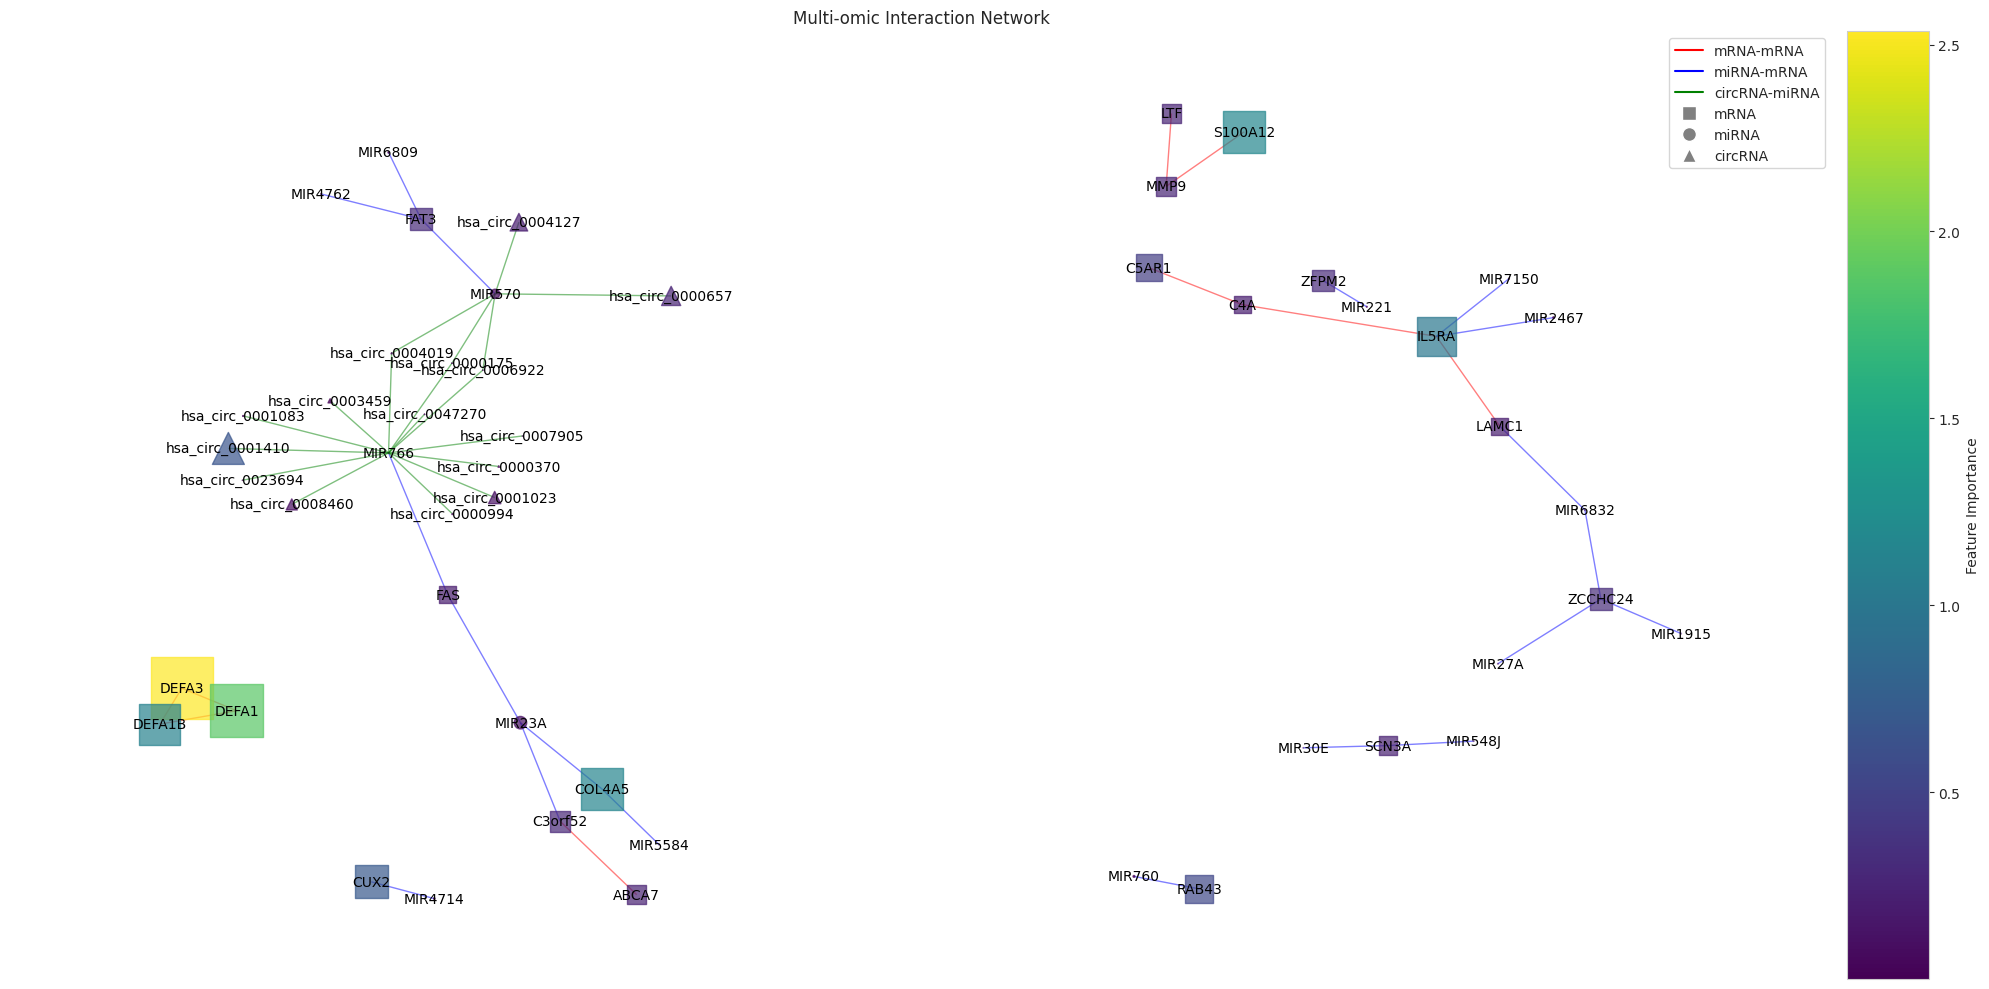

In [55]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 - disease
seed = 4580 # - risk
# seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(G, seed=seed, k=8, iterations=2000)
fig.savefig('plots/risk/multi_omic_network.png', dpi=400)

- the DEFA gene family which has high scores here has been associated with different types of cancer but not with MDS it seems
- [Whole blood defensin mRNA expression is a predictive biomarker of docetaxel response in castration-resistant prostate cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC4527520/) 


In [51]:
fig.savefig('plots/risk/multi_omic_network.png', dpi=400)

<Figure size 640x480 with 0 Axes>

[MiR-570 inhibits cell proliferation and glucose metabolism by targeting IRS1 and IRS2 in human chronic myelogenous leukemia](https://pmc.ncbi.nlm.nih.gov/articles/PMC5478775/)